# Unsupervised Learning

This notebook uses the DPA dataset with unsupervised learning.  Since Hamming Distance is the number of bits that are high in a byte, the power usage will be most different between HW=0 and HW=7 and so those classes should be the easiest to separate even with unsupervised learning.

We will first use the labels that we already have from before to see how the unsupervised algorithm should be separating the blobs into categories.  And then we'll use the KNN algorithm to check performance.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Workshop Functions
import sys
sys.path.append('..')
from WKDSS320_functions import * 

With Hamming Weight, the bigger the difference between the class numbers, the bigger the separation between classes.  for example, the separation between classes 1 and 2 is less than the separation between classes 1 and 7.  This is because the system uses more power to record a byte value with a HW=7 than it does for a byte with HW=1.  The power difference between HW=2 and 3 is small becuase HW3 represents just one additional bit going high and that is an lightly incrementally larger amount of power.

**Curiosity Points** (5 Points) - try different values for class1 and class2 and see the effect on the scatter plot further below.  Note that the extreme classes (0 and 7) have fewer observations.  

In [ ]:
class1 = 2
class2 = 6

In [ ]:
X = pd.read_csv("DPA_Data_Small.csv")
y = pd.read_csv("DPA_target.csv", index_col=0)
y = np.array(y).ravel()
type(y)

pd.Series(y).value_counts()

In [ ]:
X_2class = X.loc[(y==class1) | (y==class2),:]
X_2class.shape
y_2class = y[(y==class1) | (y==class2)]
y_2class.shape

In [ ]:
y_2class

In [ ]:
plt.scatter(X_2class.iloc[:,2],X_2class.iloc[:,3],c=y_2class)
plt.show()

#### KNN
Let's build the KNN classifier and try it out

In [ ]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2, random_state=1)
clf.fit(X_2class.iloc[:,[2,3]])
y_pred = clf.labels_

In [ ]:
y_pred

In [ ]:
y_2class

In [ ]:
y_pred[y_pred==1] = 6
y_pred[y_pred==0] = 2
y_pred

In [ ]:
plt.scatter(X_2class.iloc[:,2],X_2class.iloc[:,3],c=y_pred)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_2class, y_pred))

In [3]:
from sklearn.datasets import load_iris
data = load_iris()

In [4]:
X = data.data
y = data.target
print(X.shape, y.shape)

(150, 4) (150,)


In [8]:
var1 = 2
var2 = 3

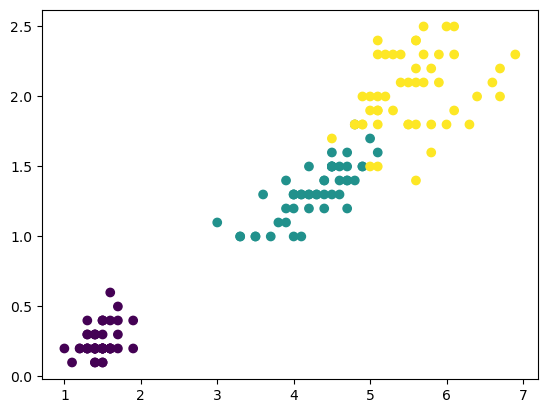

In [9]:
plt.scatter(X[:,var1],X[:,var2],  c=y)

<AxesSubplot:title={'center':'SSE / Inertia vs No. Of Clusters'}, xlabel='No. of Clusters', ylabel='SSE / Inertia'>

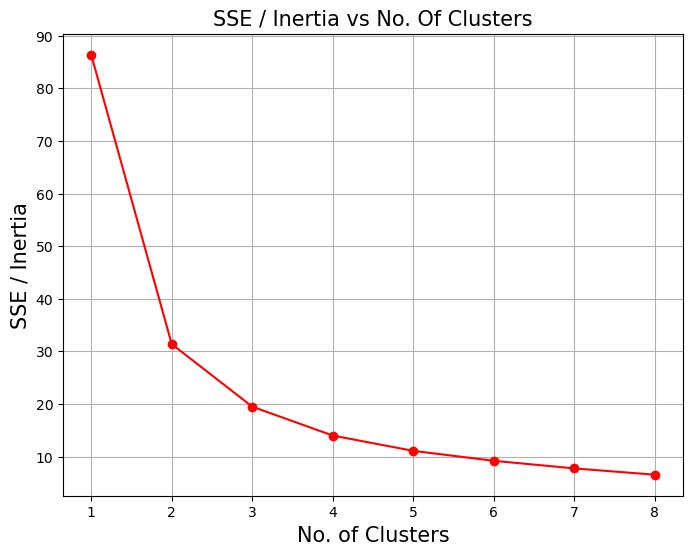

In [10]:
drawSSEPlotForKMeans(pd.DataFrame(X), [var1,var2])